In [19]:
import pandas as pd
import numpy as np

In [20]:

product = {
  'month' : [1,2,3,4,5,6,7,8,9,10,11,12],
  'demand':[290,260,288,300,310,303,329,340,316,330,308,310]
  }

df = pd.DataFrame(product)


In [23]:

print(df.head())


   month  demand  SMA_3  pandas_SMA_3
0      1     290    NaN           NaN
1      2     260    NaN           NaN
2      3     288  279.3    279.333333
3      4     300  282.7    282.666667
4      5     310  299.3    299.333333


In [24]:

for i in range(0,df.shape[0]-2):
    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

for i in [3,4,5,6,7,8]:
    df['pandas_SMA_'+str(i)] = df.iloc[:,1].rolling(window=i).mean()

print(df.head())


   month  demand  SMA_3  pandas_SMA_3  pandas_SMA_2  pandas_SMA_4  \
0      1     290    NaN           NaN           NaN           NaN   
1      2     260    NaN           NaN         275.0           NaN   
2      3     288  279.3    279.333333         274.0           NaN   
3      4     300  282.7    282.666667         294.0         284.5   
4      5     310  299.3    299.333333         305.0         289.5   

   pandas_SMA_5  pandas_SMA_6  pandas_SMA_7  pandas_SMA_8  
0           NaN           NaN           NaN           NaN  
1           NaN           NaN           NaN           NaN  
2           NaN           NaN           NaN           NaN  
3           NaN           NaN           NaN           NaN  
4         289.6           NaN           NaN           NaN  


In [25]:
import matplotlib.pyplot as plt

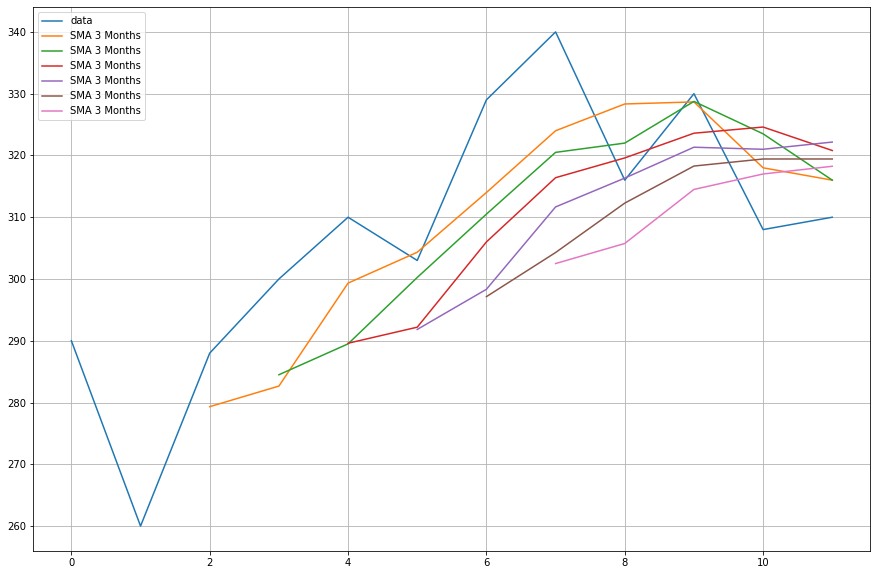

In [27]:

plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['demand'],label='data')
for i in [3,4,5,6,7,8]:
    plt.plot(df['pandas_SMA_'+str(i)],label='SMA 3 Months')
plt.legend(loc=2)
